### [Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis)

Principal Component Analysis (PCA) is a dimensionality reduction technique that is widely used in machine learning. It is used to reduce the number of features in a dataset while retaining the most important information. This is done by projecting the data onto a lower-dimensional subspace that maximizes the variance of the data.

In order to realise that PCA actually works 😅 we will try finding the best fit line for a 2-dimensional data using PCA.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def data1():
    x = [np.random.rand() for i in range(1000)]
    y = [x[i] + 0.05*np.random.rand() for i in range(1000)]
    return np.array([x, y]).T

def data2():
    x = [np.random.rand() for i in range(1000)]
    y = [(x[i])**2 + 0.05*np.random.rand() for i in range(1000)]
    return np.array([x, y]).T

# Standardisation of Data
def std_data(nparray):
    # Implement standardisation of data
    mean = np.mean(nparray, axis=0)
    std = np.std(nparray, axis=0)
    std_data = (nparray-mean)/std
    # mean = np.mean(nparray, axis=0)
    # print(mean)
    return std_data,mean
# Calculating covariance matrix
def covariance(nparray):
  cov_mat=np.cov(nparray.T)
  return cov_mat
# Computing eigen values eigen matrix
def eigen_values_and_matrix(cov_mat):
  eigen_values,eigen_vectors=np.linalg.eig(cov_mat)
  return eigen_values,eigen_vectors
# Sorting the eigen vectors according to the eigen values
def sort_eigen_values_and_vectors(eigen_values,eigen_vectors):
  sorted_eigen_value_indices=np.argsort(eigen_values)[::-1]
  sorted_eigen_values=eigen_values[sorted_eigen_value_indices]
  sorted_eigen_vectors=eigen_vectors[:,sorted_eigen_value_indices]
  # print(sorted_eigen_vectors.shape[0])
  return sorted_eigen_values,sorted_eigen_vectors
# selecting the first k eigen vectors to form the projection matrix
def projection_matrix(sorted_eigen_vectors,k):
  projection_matrix=sorted_eigen_vectors[:,:k]
  return projection_matrix
# projecting the data using the projection matrix
def projecting_data(std_data,projection_matrix):
  projected_data=np.dot(std_data.T,projection_matrix)
  return projected_data
# applying PCA
def pca(X):
    X_standardized, mean = std_data(X)
    cov_matrix = covariance(X_standardized)
    eigenvalues, eigenvectors = eigen_values_and_matrix(cov_matrix)
    sorted_eigenvalues, sorted_eigenvectors = sort_eigen_values_and_vectors(eigenvalues, eigenvectors)
    principal_component = sorted_eigenvectors[:, 0]
    return principal_component, mean

def get_line_equation(principal_component, mean):
    v1, v2 = principal_component
    mu1, mu2 = mean
    m = v2 / v1
    c = mu2 - m * mu1
    return m, c



In [2]:

def DimReduction(arr):
    data_set = arr

    principal_component, mean = pca(data_set)
    m, c = get_line_equation(principal_component, mean)
    # Displaying the result using matplotlib
    data_set=np.array(arr).T
    plt.scatter(data_set[0], data_set[1], color = "red")
    plt.plot(data_set[0], data_set[0]*m + c)
    print("Slope =", m, "Intercept =", c)
    plt.title("Best Fit Line")
    plt.show()

Slope = 1.0 Intercept = 0.02483777626507727


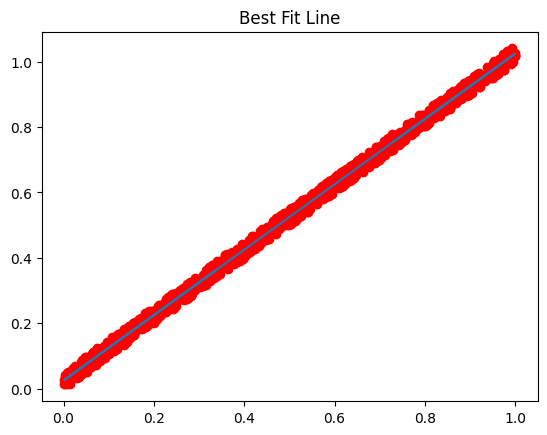

Slope = 0.9999999999999997 Intercept = -0.14211351870567307


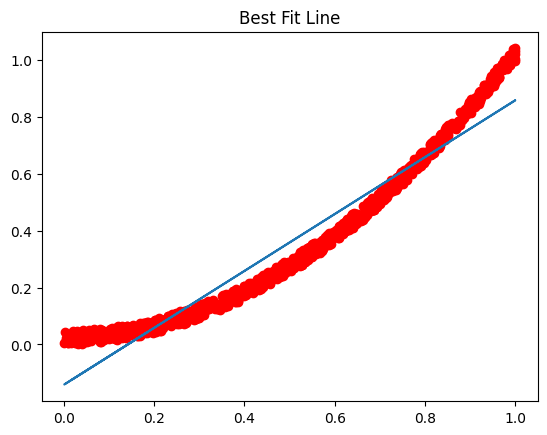

In [3]:
DimReduction(data1())
DimReduction(data2())